<a href="https://colab.research.google.com/github/Nightcrawler9x/Beyond_visible_spectrum/blob/main/challenge_convexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge

##Generalidades

In [9]:
#@title Imports
import gdown
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
#@title Funciones
def load_from_drive(file_id, name):
  gdown.download(id=file_id, output=name, quiet=False)
  return name

In [2]:
#@title Carga de los datos
%%capture
load_from_drive('1kVbztu0a5E3qefYhMNi7KUgzQXo12uOn', 'data.zip')
!unzip "/content/data.zip" -d "/content/data"

##Exploracion de los datos

In [6]:
df_train = pd.read_csv('/content/data/train.csv')
df_test = pd.read_csv('/content/data/test.csv')

In [41]:
df_train.head()

,id,label
0,sample697.npy,7
1,sample54.npy,81
2,sample2270.npy,4
3,sample1401.npy,99
4,sample1901.npy,43


In [42]:
df_test.head()

,id
0,sample1957.npy
1,sample1369.npy
2,sample782.npy
3,sample2255.npy
4,sample2160.npy


In [38]:
ruta = '/content/data/train.csv'
dir_npys = '/content/data/ot/ot'

chunk_size = 1

for chunk in pd.read_csv(ruta, chunksize=chunk_size):
    datos = []
    etiquetas = []

    for idx, fila in chunk.iterrows():
        npy_path = os.path.join(dir_npys, fila['id'])

        try:
            muestra = np.array(np.load(npy_path))
            datos.append(muestra)
            etiquetas.append(fila['label'])
        except Exception as e:
            print(f"Error cargando {npy_path}: {e}")

    y_chunk = np.array(etiquetas)

Error cargando /content/data/ot/ot/sample2451.npy: cannot reshape array of size 1785856 into shape (128,128,125)


In [35]:
len(datos)

1

In [36]:
datos[0].shape

(128, 128, 125)

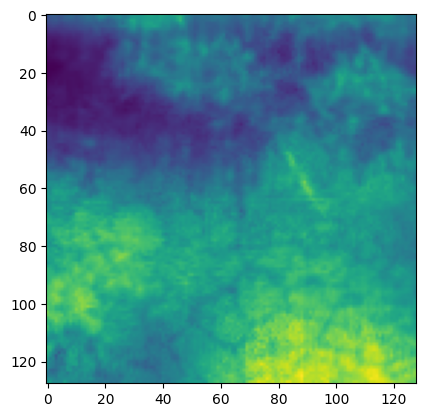

In [28]:
msimg = datos[1]
plt.imshow(msimg[:,:,1])
plt.show()